# Linear Regression model for House Price dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("./Dinesh Sir Notes/Day-21/dataset/Linear Regression.xlsx", sheet_name=0)

df.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [3]:
df.tail()

,price,sqft_living,bedrooms,bathrooms,floors
21608,360000,1530,3,2.50,3.0
21609,400000,2310,4,2.50,2.0
21610,402101,1020,2,0.75,2.0
21611,400000,1600,3,2.50,2.0
21612,325000,1020,2,0.75,2.0


In [4]:
df.isna().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


No missing values in the dataset and all dtypes are numerical.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141905,367127.195968,75000.0,321950.00,450000.00,645000.0,7700000.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5


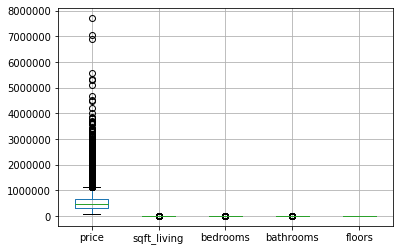

In [7]:
df.boxplot()

The price variable shows many outliers whereas not much is observed among the other varaibles.

In [8]:
df.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AB52E40D08>,
      dtype=object)

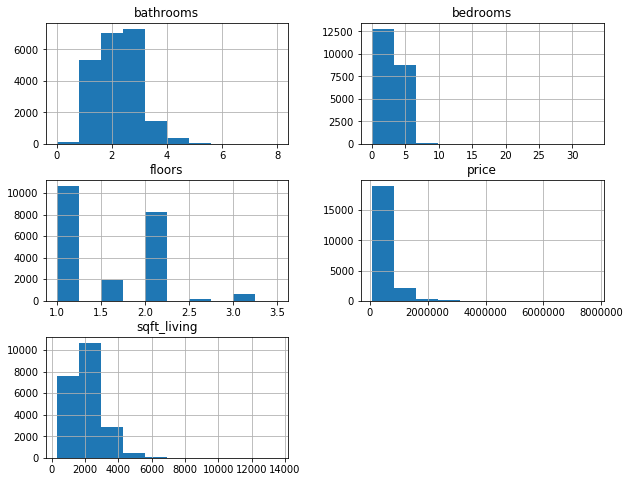

In [9]:
df.hist(figsize=(10,8))

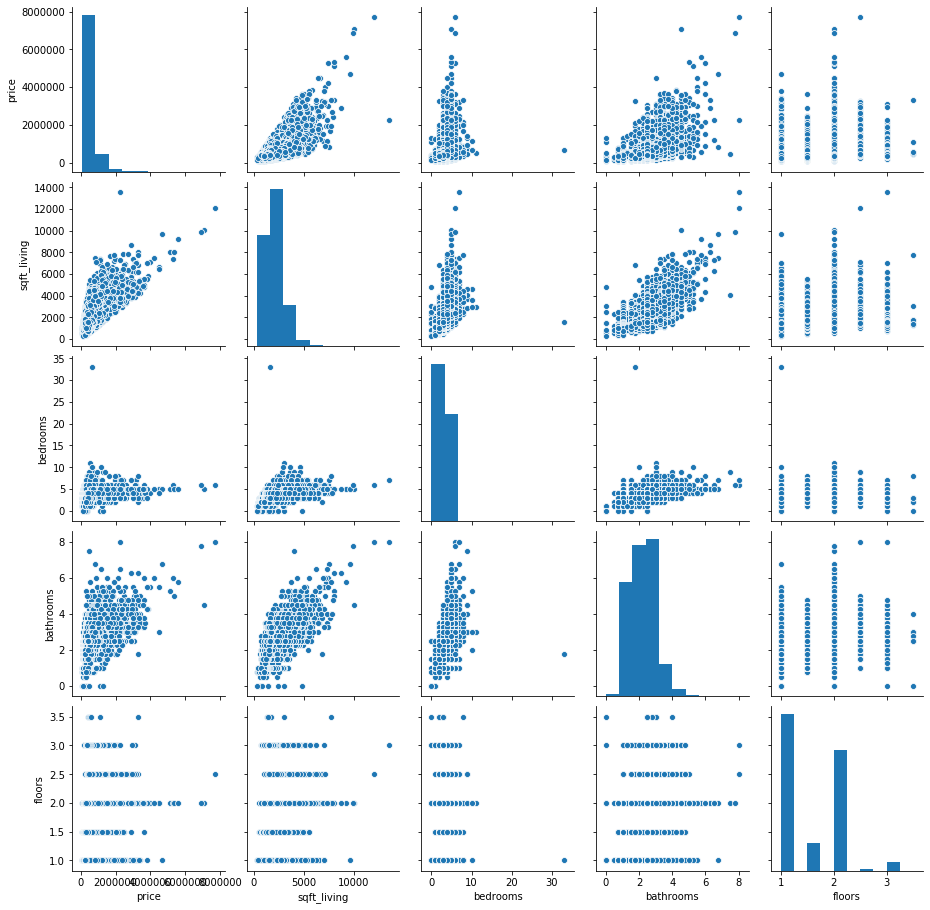

In [10]:
sns.pairplot(df)

The above plots shows the following :
    1. A moderate to high correlation between price and sqft_living as well as sqft_living and bathrooms.
    2. Moderate correlation between price and bathroom.
    3. A low correlation between price and floors.

# Correlation of price with sqft_living

In [11]:
# Assigning X and y to feature variables.

X = df.iloc[:,1:2]
y = df.iloc[:,0:1]

In [12]:
X.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [13]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [14]:
X.shape

(21613, 1)

In [15]:
y.shape

(21613, 1)

In [16]:
df.shape

(21613, 5)

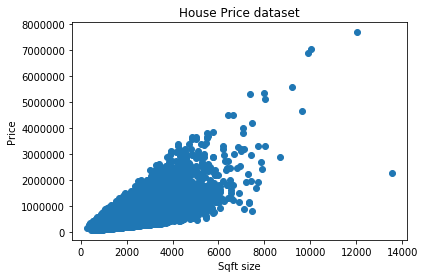

In [17]:
# Dataset visualisation

plt.scatter(X,y)
plt.title('House Price dataset')
plt.xlabel('Sqft size')
plt.ylabel('Price')
plt.show()

In [18]:
# Splitting the data into train and test dataset.

from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.25, random_state=0)

In [19]:
X_test.shape

(16209, 1)

In [20]:
X_train.shape

(5404, 1)

In [21]:
y_test.shape

(16209, 1)

In [22]:
y_train.shape

(5404, 1)

In [23]:
# Using linearRegression to fit the data.

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [24]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
lr.coef_

array([[281.68271004]])

In [26]:
lr.intercept_

array([-49688.79458127])

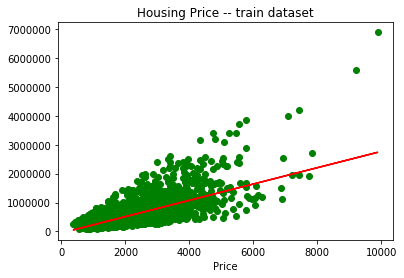

In [27]:
# Visualisation of train dataset

plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, lr.predict(X_train), color='red')
plt.title('Housing Price -- train dataset')
plt.xlabel('Sqft size')
plt.xlabel('Price')
plt.show()

In [28]:
# Test the model

y_pred = lr.predict(X_test)

y_pred

array([[220726.60705696],
       [375652.09757887],
       [420721.33118524],
       ...,
       [615082.40111272],
       [617899.22821312],
       [620716.05531352]])

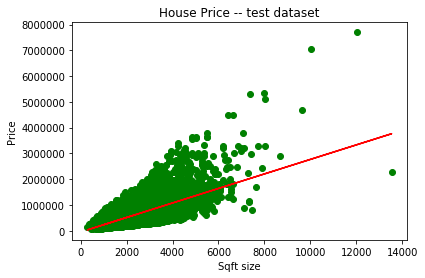

In [29]:
# Visualise the test dataset

plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, lr.predict(X_test), color='red')
plt.title('House Price -- test dataset')
plt.xlabel('Sqft size')
plt.ylabel('Price')
plt.show()

In [30]:
# Calculating the deciding factor Rsquare.

from sklearn.metrics import r2_score, mean_squared_error
Rsquare = r2_score(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print('The Rsquare value is :', Rsquare)
print('The RMSE value is :', RMSE)

The Rsquare value is : 0.4957989411162118
The RMSE value is : 261293.04886470787


The Rsquare value of 0.49 shows a low to moderate fitting.

In [31]:
df.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [32]:
unseen_pred = lr.predict(np.array([[1100]]))
unseen_pred

array([[260162.18646254]])

In [33]:
# OLS method

from statsmodels.api import OLS

result = OLS(y_train, X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.835
Model:                            OLS   Adj. R-squared (uncentered):              0.835
Method:                 Least Squares   F-statistic:                          2.740e+04
Date:                Tue, 15 Dec 2020   Prob (F-statistic):                        0.00
Time:                        17:17:10   Log-Likelihood:                         -75104.
No. Observations:                5404   AIC:                                  1.502e+05
Df Residuals:                    5403   BIC:                                  1.502e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   261.5311      1.580    165.535      0.000     258.434     264.628
==============================================================================
Omnibus:                     4181.628   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           193754.717
Skew:                           3.281   Prob(JB):                         0.00
Kurtosis:                      31.591   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Correlation of price with bedrooms

In [36]:
# Split the data into X and y for IDV and DV features resp.

In [34]:
X = df.iloc[:,2:3]
X.head()

,bedrooms
0,3
1,3
2,2
3,4
4,3


In [35]:
y = df.iloc[:,0:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [207]:
# Split the dataset for train and test purpose

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [208]:
X_train.shape

(15129, 1)

In [209]:
X_test.shape

(6484, 1)

In [210]:
y_train.shape

(15129, 1)

In [211]:
y_test.shape

(6484, 1)

In [212]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [213]:
lr.coef_

array([[117624.85005881]])

In [214]:
lr.intercept_

array([142666.6768922])

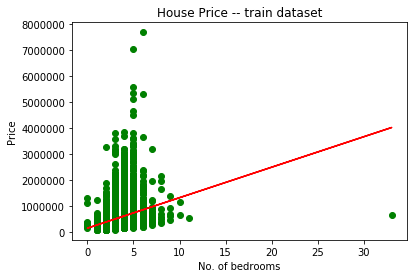

In [215]:
# Visualise train dataset

plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, lr.predict(X_train), color='red')
plt.title('House Price -- train dataset')
plt.xlabel('No. of bedrooms')
plt.ylabel('Price')
plt.show()

In [216]:
# test the model

y_pred = lr.predict(X_test)

y_pred

array([[495541.22706862],
       [495541.22706862],
       [495541.22706862],
       ...,
       [495541.22706862],
       [377916.37700982],
       [495541.22706862]])

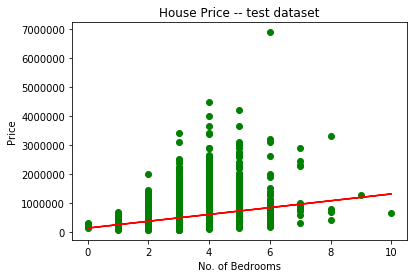

In [217]:
# Visualise test dataset

plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, lr.predict(X_test), color='red')
plt.title('House Price -- test dataset')
plt.xlabel('No. of Bedrooms')
plt.ylabel('Price')
plt.show()

A distinct increase in price is seen on houses with more number of bedrooms.

In [218]:
# Calculating the deciding factor : Rsquare

Rsquare = r2_score(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print('The Rsquare value is :', Rsquare)
print('THe RMSE value is :', RMSE)

The Rsquare value is : 0.10339172850350031
THe RMSE value is : 349277.91043755243


The Rsqaure value of 0.10 is very low, showing a minimal correlation and hence the model fitting isn't as great.

In [219]:
# OLS method

result = OLS(y_pred, y_test).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.717
Model:                            OLS   Adj. R-squared (uncentered):              0.717
Method:                 Least Squares   F-statistic:                          1.640e+04
Date:                Tue, 15 Dec 2020   Prob (F-statistic):                        0.00
Time:                        19:10:13   Log-Likelihood:                         -90814.
No. Observations:                6484   AIC:                                  1.816e+05
Df Residuals:                    6483   BIC:                                  1.816e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price          0.7095      0.006    128.059      0.000       0.699       0.720
==============================================================================
Omnibus:                     5090.076   Durbin-Watson:                   1.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           207276.051
Skew:                          -3.416   Prob(JB):                         0.00
Kurtosis:                      29.843   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Correlation of price with bathrooms

In [223]:
# Assign X and y to IDV and DV features

In [221]:
X = df.iloc[:, 3:4]
X.head()

,bathrooms
0,1.00
1,2.25
2,1.00
3,3.00
4,2.00


In [222]:
y = df.iloc[:, 0:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [224]:
# Split the the data for train and test purpose

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [225]:
X_train.shape

(16209, 1)

In [226]:
X_test.shape

(5404, 1)

In [227]:
y_train.shape

(16209, 1)

In [228]:
y_test.shape

(5404, 1)

In [229]:
# Using Linear Regression on train dataset
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [230]:
lr.coef_

array([[248840.77633798]])

In [231]:
lr.intercept_

array([14640.20448119])

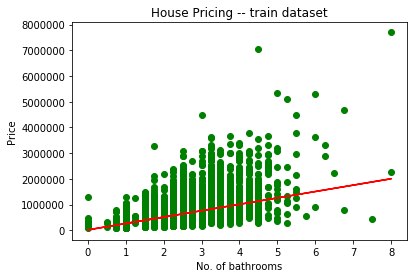

In [232]:
# Visualise the train dataset

plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, lr.predict(X_train), color='red')
plt.title('House Pricing -- train dataset')
plt.xlabel('No. of bathrooms')
plt.ylabel('Price')
plt.show()

In [233]:
y_pred = lr.predict(X_test)
y_pred

array([[387901.36898815],
       [823372.72757961],
       [201270.78673467],
       ...,
       [636742.14532613],
       [387901.36898815],
       [263480.98081917]])

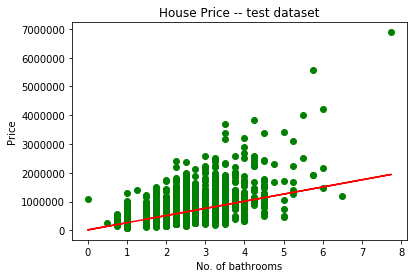

In [234]:
# Visualise the test dataset

plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, lr.predict(X_test), color='red')
plt.title('House Price -- test dataset')
plt.xlabel('No. of bathrooms')
plt.ylabel('Price')
plt.show()

A general increase in price is observed as the number of bathrooms increase.

In [235]:
# Calculating the deciding factor : Rsquare

Rsquare = r2_score(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print('The Rsquare value is :', Rsquare)
print('The RMSE value is :', RMSE)

The Rsquare value is : 0.28715065698286146
The RMSE value is : 307726.05201098864


The Rsquare value of 0.28 is observed, indicating a moderate fitting of the model.

In [236]:
# OLS method

result = OLS(y_pred, y_test).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.774
Model:                            OLS   Adj. R-squared (uncentered):              0.774
Method:                 Least Squares   F-statistic:                          1.851e+04
Date:                Tue, 15 Dec 2020   Prob (F-statistic):                        0.00
Time:                        19:32:16   Log-Likelihood:                         -75280.
No. Observations:                5404   AIC:                                  1.506e+05
Df Residuals:                    5403   BIC:                                  1.506e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price          0.7761      0.006    136.066      0.000       0.765       0.787
==============================================================================
Omnibus:                     3447.778   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98628.788
Skew:                          -2.588   Prob(JB):                         0.00
Kurtosis:                      23.279   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Correlation of price with floors

In [248]:
# Assign X and y to feature variables.

X = df.iloc[:,4:]
y = df.iloc[:, 0:1]

In [249]:
X.head()

,floors
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0


In [250]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [275]:
# Split the train and test dataset.

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=25)

In [276]:
X_train.shape

(16209, 1)

In [277]:
X_test.shape

(5404, 1)

In [278]:
y_train.shape

(16209, 1)

In [279]:
y_test.shape

(5404, 1)

In [280]:
# Using Linear Regression to fit data.
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [281]:
lr.coef_

array([[170320.1147413]])

In [282]:
lr.intercept_

array([283514.8420018])

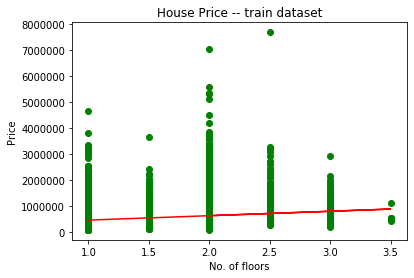

In [283]:
# Visualise train dataset

plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, lr.predict(X_train), color='red')
plt.title('House Price -- train dataset')
plt.xlabel('No. of floors')
plt.ylabel('Price')
plt.show()

In [284]:
y_pred = lr.predict(X_test)
y_pred

array([[453834.9567431 ],
       [453834.9567431 ],
       [453834.9567431 ],
       ...,
       [538995.01411375],
       [453834.9567431 ],
       [453834.9567431 ]])

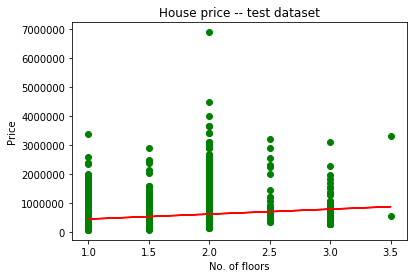

In [285]:
# Visualise the test dataset

plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, lr.predict(X_test), color='red')
plt.title('House price -- test dataset')
plt.xlabel('No. of floors')
plt.ylabel('Price')
plt.show()

The plot indicates very little correlation between price and floors.

In [286]:
# Calculating the Rsquare value

Rsquare = r2_score(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print('The Rsquare value is :', Rsquare)
print('The RMSE value is :', RMSE)

The Rsquare value is : 0.07057630452343466
The RMSE value is : 363018.11000063905


The Rsqaure value is observed to be 0.07, indicating a low fitting for the model.

In [287]:
# OLS method

result = OLS(y_pred, y_test).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.700
Model:                            OLS   Adj. R-squared (uncentered):              0.700
Method:                 Least Squares   F-statistic:                          1.261e+04
Date:                Tue, 15 Dec 2020   Prob (F-statistic):                        0.00
Time:                        19:51:53   Log-Likelihood:                         -75790.
No. Observations:                5404   AIC:                                  1.516e+05
Df Residuals:                    5403   BIC:                                  1.516e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price          0.6878      0.006    112.299      0.000       0.676       0.700
==============================================================================
Omnibus:                     4430.114   Durbin-Watson:                   1.405
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           202900.851
Skew:                          -3.607   Prob(JB):                         0.00
Kurtosis:                      32.139   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multi Linear Regression -- 

In [288]:
# Assign X and y to IDV and DV.

In [289]:
X = df.iloc[:,1:]
X.head()

,sqft_living,bedrooms,bathrooms,floors
0,1180,3,1.00,1.0
1,2570,3,2.25,2.0
2,770,2,1.00,1.0
3,1960,4,3.00,1.0
4,1680,3,2.00,1.0


In [291]:
y = df.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [292]:
# Split the data into train and test data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [293]:
X_train.shape

(16209, 4)

In [294]:
X_test.shape

(5404, 4)

In [295]:
y_train.shape

(16209, 1)

In [296]:
y_test.shape

(5404, 1)

In [301]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [302]:
lr.coef_

array([[   310.85557681, -54235.21219477,   1633.65680478,
          2182.86083611]])

In [303]:
lr.intercept_

array([70791.48015695])

In [309]:
y_pred = lr.predict(X_test)
y_pred

array([[ 415843.59831652],
       [1315221.28135297],
       [ 413361.18980878],
       ...,
       [ 922318.01197294],
       [ 279528.77024785],
       [ 416579.82605847]])

In [310]:
df.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [311]:
unseen_pred = lr.predict(np.array([[1200, 3, 2, 3]]))
unseen_pred

array([[290928.4318586]])

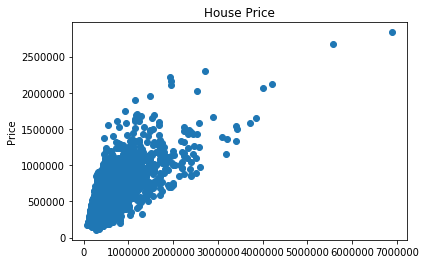

In [316]:
# Visualise the data

plt.scatter(y_test, y_pred)
plt.title('House Price')
plt.ylabel('Price')
plt.show()

In [312]:
# Calculate the Rsquare

Rsquare = r2_score(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print(' The Rsquare value is :', Rsquare)
print('The RMSE value is :', RMSE)

 The Rsquare value is : 0.5003085644927433
The RMSE value is : 257641.80978974784


The Rsquare value is 0.50, which indicates a moderate fitting of the model.

In [315]:
# OLS method

result = OLS(y_pred, y_test).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.842
Model:                            OLS   Adj. R-squared (uncentered):              0.842
Method:                 Least Squares   F-statistic:                          2.872e+04
Date:                Tue, 15 Dec 2020   Prob (F-statistic):                        0.00
Time:                        20:12:51   Log-Likelihood:                         -74565.
No. Observations:                5404   AIC:                                  1.491e+05
Df Residuals:                    5403   BIC:                                  1.491e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price          0.8468      0.005    169.477      0.000       0.837       0.857
==============================================================================
Omnibus:                     2664.570   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54296.607
Skew:                          -1.882   Prob(JB):                         0.00
Kurtosis:                      18.065   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""